<h1 align='center'>Classificação de spam Machine Learning | Implantação End-to-End | classificador de spam usando Python</h1>

Data Scientist jr: Karina Gonçalves Soares

Links de estudo:

* [Repositório_Spam_classification](https://github.com/EddyGiusepe/Spam_classifier_using_Python/blob/main/spam_classification_ML_End_to_End_Deployment.ipynb)
* [Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)


Nesse script vamos aprender como construir e implementar um modelo de classificação de spam de ponta a ponta (end-to-end) usando NLP Machine Learning. Vamos estudar e visualizar como criar uma NUVEM DE PALAVRAS.

Também aprenderemos como criar e usar o arquivo Pickle do modelo de aprendizado de máquina.

### Importando Bibliotecas

In [1]:
import pandas as pd # Análise de Dados
import numpy as np  # Computação científica e funções matemáticas
import pickle # Converte objetos Python em uma série em Bytes
import nltk # Processamento de Linguagem natural
import re # Fornece recursos para trabalhar com expressões regulares,
          # que são padrões de busca usados para encontrar correspondências em string de texto.
import csv # Manipulação de arquivos csv

import matplotlib.pyplot as plt # Visualização
%matplotlib inline  
import seaborn as sns # Visualização

from sklearn.metrics import accuracy_score, fbeta_score, classification_report # Métricas de avaliação de modelos
from wordcloud import wordcloud # Gera nuvem de palavras a partir de um texto
from nltk.tokenize import word_tokenize

# Divide o texto em tokens, como palavras individuais
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/karinag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Carregando nossos Dados

In [2]:
'''import csv

with open('spam.csv', mode='r', encoding='ISO-8859-1') as arquivo:
    arquivo_csv = csv.reader(arquivo, delimiter=',')
    linhas = 0
    for coluna in arquivo_csv:
        if linhas == 0:
            print(f'Colunas:  {" ".join(coluna)}')
            linhas += 1
        else:
            print(f'\t{coluna[0]} é o {coluna[1]}')
            linhas += 1 

    print(f'lidas {linhas} linhas.')

        # Faça algo com cada linha do arquivo CSV
        #linhas += 1'''


'import csv\n\nwith open(\'spam.csv\', mode=\'r\', encoding=\'ISO-8859-1\') as arquivo:\n    arquivo_csv = csv.reader(arquivo, delimiter=\',\')\n    linhas = 0\n    for coluna in arquivo_csv:\n        if linhas == 0:\n            print(f\'Colunas:  {" ".join(coluna)}\')\n            linhas += 1\n        else:\n            print(f\'\t{coluna[0]} é o {coluna[1]}\')\n            linhas += 1 \n\n    print(f\'lidas {linhas} linhas.\')\n\n        # Faça algo com cada linha do arquivo CSV\n        #linhas += 1'

In [3]:
# Ver vídeo para ler um arquivo .csv --> https://www.youtube.com/watch?v=K1RLuCp_LvI

df = pd.read_csv('spam.csv',
                     sep=',', encoding='ISO-8859-1', header=0, usecols=['v1', 'v2'])

df.head(5)
#display(msg_df)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Renomeando colunas

df = df.rename(columns={"v1":"label", "v2":"mensagem"})

In [5]:
df.head(2)

,label,mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [6]:
df.shape

(5572, 2)

***Print da importação do stop words***

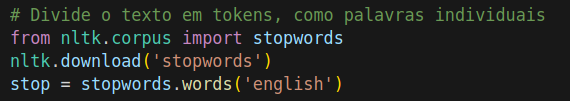

In [7]:
# stop words

stop;

Em processamento de linguagem natural (NLP), `stop words` são palavras muito comuns que geralmente não contribuem significativamente para o significado de uma frase ou texto. Exemplos de stop words incluem artigos (por exemplo, "o", "a", "um"), preposições (por exemplo, "em", "de", "para"), pronomes pessoais (por exemplo, "eu", "você", "ele") e outras palavras muito frequentes que podem ser consideradas irrelevantes em muitas análises de texto.

Em Python, as `stop words são frequentemente usadas na etapa de pré-processamento de texto em tarefas de NLP, como classificação de texto, análise de sentimentos e extração de informações.` A remoção de stop words pode ajudar a reduzir o ruído nos dados e melhorar a eficiência do processamento de texto, pois essas palavras tendem a ser usadas com frequência e não fornecem muita informação discriminativa.

A biblioteca NLTK (Natural Language Toolkit) em Python é comumente usada para trabalhar com stop words. Ela fornece uma lista de stop words em diferentes idiomas, incluindo o inglês. Você pode importar a lista de stop words do NLTK e removê-las de um texto usando os recursos fornecidos pela biblioteca.

In [8]:
df.describe()

,label,mensagem
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


O método describe() é usado para gerar estatísticas descritivas de um DataFrame em Python. Ele fornece um resumo estatístico que inclui contagem, média, desvio padrão, mínimo, quartis (25%, 50%, 75%) e máximo para cada coluna numérica do DataFrame.

Com base na saída do método describe(), podemos inferir o seguinte para o DataFrame ***df***:

* A coluna "label" tem 5572 valores não nulos.
* A coluna "label" tem 2 valores únicos. Isso sugere que a coluna "label" é categórica com duas categorias distintas.
* O valor mais frequente na coluna "label" é "ham", que aparece 4825 vezes.
* A coluna "mensagem" tem 5572 valores não nulos.
* A coluna "mensagem" tem 5169 valores únicos. Isso sugere que existem 5169 mensagens únicas na coluna.
* A mensagem "Sorry, I'll call later" é a mais frequente na coluna "mensagem", aparecendo 30 vezes.


In [9]:
# Agrupando dados da coluna "label" e aplicando método .decribe() em cada grupo resultante.

df.groupby('label').describe()

mensagem                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

A saída indica os `resultados da aplicação do método describe()` no DataFrame agrupado por "label". Aqui estão as informações fornecidas:

Para a categoria "ham":
* Há um total de 4825 mensagens classificadas como "ham".
* Há 4516 mensagens únicas na categoria "ham".
* A mensagem mais frequente na categoria "ham" é "Sorry, I'll call later", que aparece 30 vezes.

Para a categoria "spam":
* Há um total de 747 mensagens classificadas como "spam".
* Há 653 mensagens únicas na categoria "spam".
* A mensagem mais frequente na categoria "spam" é "Please call our customer service representative...", que aparece 4 vezes.

`O código df['label'].value_counts()`, mostrado a seguir,  retorna a contagem de valores únicos na coluna "label" do DataFrame **df**. Ele mostra quantas ocorrências existem para cada valor único na coluna "label" e retorna os resultados em ordem decrescente de contagem.

In [10]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

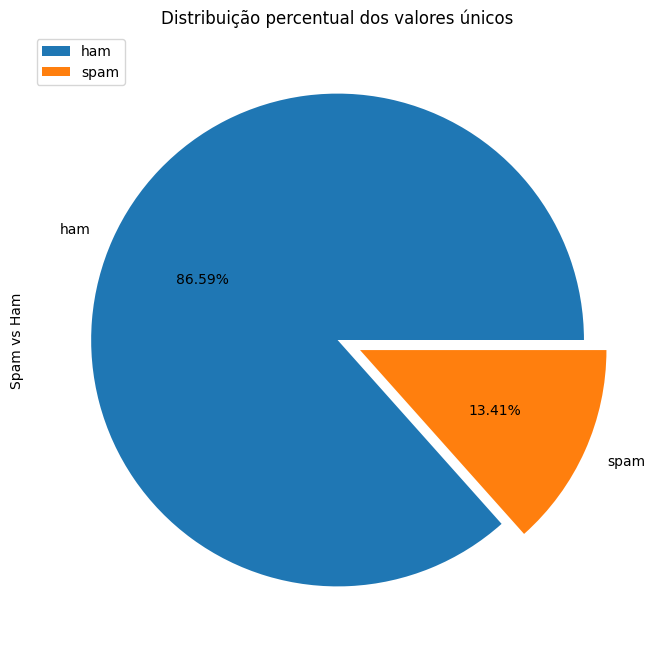

In [11]:
# Distribuição percentual dos valores únicos

df['label'].value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(8, 8), autopct= '%1.2f%%')
plt.title('Distribuição percentual dos valores únicos')
plt.ylabel('Spam vs Ham')
plt.legend(loc='upper left')
plt.show()

In [12]:
df.groupby('mensagem')['label'].agg([len, np.max]).sort_values(by='len', ascending=False).head(10)

,len,max
mensagem,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


O código `df.groupby('message')['label'].agg([len, np.max]).sort_values(by='len', ascending=False).head(10)` realiza uma série de operações no DataFrame ***df*** para obter informações sobre as mensagens mais frequentes. Vou explicar cada parte do código separadamente:

* df.groupby('mensagem'): Agrupa o DataFrame pelo conteúdo da coluna 'message'.

* ['label']: Seleciona a coluna 'label' para análise.

* agg([len, np.max]): Aplica as funções de agregação 'len' (contagem de ocorrências) e 'np.max' (valor máximo) na coluna 'label' para cada grupo de mensagens.

* sort_values(by='len', ascending=False): Classifica os resultados com base na contagem (len) em ordem decrescente.

* head(10): Retorna as 10 primeiras linhas dos resultados classificados.

A saída desse código será uma tabela que mostra as 10 mensagens mais frequentes, juntamente com o número de ocorrências (len) e o valor máximo de 'label' para cada mensagem. A tabela estará ordenada pela contagem em ordem decrescente.

In [13]:
# length --> tamanho de carateres em cada mensagem.

df['comprimento'] = df['mensagem'].apply(len)
df.head()
     

,label,mensagem,comprimento
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


O código acima adiciona uma nova coluna chamada `'comprimento'` ao DataFrame ***df***, que armazena o tamanho de caracteres em cada mensagem da coluna 'mensagem'. A função `apply(len)]` é aplicada a cada elemento da coluna 'mensagem', calculando o comprimento de caracteres de cada mensagem.

In [14]:
df.comprimento.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: comprimento, dtype: float64

In [15]:
# Aqui vamos a visualizar a mensagem que tem o máximo de caracteres

df[df['comprimento'] == 910]['mensagem'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

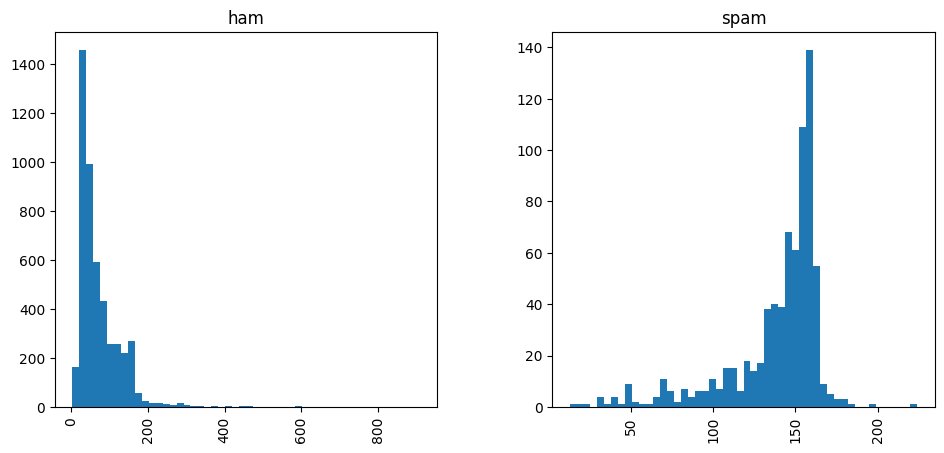

In [16]:
df.hist(column='comprimento', by='label', bins=50, figsize=(11, 5))
plt.show()

# OBS:
#Parece que quanto mais longa a mensagem, mais provável é um spam. Não vamos esquecer isso.

### Transformação de texto

Limpeza de dados --> Removendo dados sem importância/Stopwords/Stemming

In [17]:
df.head()

,label,mensagem,comprimento
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import string

def cleanText(mensagem):
    mensagem = re.sub('[^a-zA-Z]', ' ', mensagem)
    mensagem = mensagem.lower()
    mensagem = mensagem.split()
    letras = [ss.stem(letra) for letra in mensagem if letra not in stop]

    return " ".join(letras)

A função `cleanText` realiza algumas operações de pré-processamento em uma mensagem de texto. Vou explicar o que cada linha do código faz:

* import string: Importa o módulo string, que contém funções para manipulação de strings em Python.

* def cleanText(mensagem):: Define a função cleanText com um parâmetro de entrada chamado mensagem.

* mensagem = re.sub('[^a-zA-Z]', ' ', mensagem): Remove caracteres não alfabéticos da mensagem substituindo-os por espaços em branco. Isso é feito usando a função re.sub() do módulo re (expressões regulares) em Python.

* mensagem = mensagem.lower(): Converte a mensagem para letras minúsculas.

* mensagem = mensagem.split(): Divide a mensagem em uma lista de palavras com base nos espaços em branco.

* letras = [ss.stem(letra) for letra in mensagem if letra not in stop]: Cria uma nova lista chamada letras aplicando o processo de stemming (redução de palavras às suas formas básicas) usando a função ss.stem() em cada palavra da mensagem. Além disso, as palavras são filtradas com base na condição if letra not in stop, que verifica se a palavra não está na lista de stopwords.

* return " ".join(letras): Retorna as palavras da lista letras como uma única string, onde as palavras são unidas por espaços em branco.

Essa função cleanText pode ser usada para pré-processar mensagens de texto, removendo caracteres indesejados, convertendo letras em minúsculas, realizando stemming e filtrando stopwords. Ela retorna a mensagem pré-processada como uma string limpa.

In [19]:
# Verificamos a nossa função anterior:
cleanText(":)I LOVE you, my God!")

'love god'

In [20]:
# Aplicamos a limpeza a nossa coluna mensagem

df['mensagem'] =  df['mensagem'].apply(cleanText)

# Logo visualizamos nossos Dados

df.head(6)

,label,mensagem,comprimento
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
5,spam,freemsg hey darl week word back like fun still...,148


In [21]:
# Aqui vamos separar as mensagens de Spam e as mensagens de Ham

spam_msg = df[df['label'] == 'spam']['mensagem']

ham_msg = df[df['label'] == 'ham']['mensagem']

Aqui está a explicação de cada linha do código:

`spam_msg = df[df['label'] == 'spam']['mensagem']`: Cria a variável spam_msg que armazena as mensagens da coluna 'mensagem' onde a coluna 'label' é igual a "spam". Isso é feito filtrando o DataFrame ***df*** com a condição df['label'] == 'spam' e, em seguida, selecionando a coluna 'mensagem'.

`ham_msg = df[df['label'] == 'ham']['mensagem']`: Cria a variável ham_msg que armazena as mensagens da coluna 'mensagem' onde a coluna 'label' é igual a "ham". Isso é feito filtrando o DataFrame ***df*** com a condição df['label'] == 'ham' e, em seguida, selecionando a coluna 'mensagem'.

In [22]:
spam_msg

2       free entri wkli comp win fa cup final tkts st ...
5       freemsg hey darl week word back like fun still...
8       winner valu network custom select receivea pri...
9       mobil month u r entitl updat latest colour mob...
11      six chanc win cash pound txt csh send cost p d...
                              ...                        
5537    want explicit sex sec ring cost p min gsex pob...
5540    ask mobil chatlin inclu free min india cust se...
5547    contract mobil mnths latest motorola nokia etc...
5566    remind get pound free call credit detail great...
5567    nd time tri contact u u pound prize claim easi...
Name: mensagem, Length: 747, dtype: object

In [23]:
ham_msg

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: mensagem, Length: 4825, dtype: object

In [24]:
# Baixar o recurso "punkt" do NLTK, que inclui os modelos e pacotes para a tokenização de palavras.
# Esse pacote contém modelos treinados para a tokenização de palavras em diferentes idiomas.

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/karinag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
spam_palavras = []
ham_palavras = []

def extractSpamWords(spamMsg):
    global spam_palavras
    palavras = [palavra for palavra in word_tokenize(spamMsg)]
    spam_palavras = spam_palavras + palavras

def extractHamWords(hamMsg):
  global ham_palavras
  palavras = [ palavra for palavra in word_tokenize(hamMsg)]
  ham_palavras = ham_palavras + palavras

# spam_msg.apply(extractSpamWords)
# ham_msg.apply(extractHamWords)
     

Uma breve explicação das funções:

`extractSpamWords(spamMsg):` Recebe uma mensagem de spam como entrada (spamMsg), tokeniza a mensagem usando word_tokenize() da biblioteca NLTK e adiciona as palavras extraídas à lista spam_palavras.

`extractHamWords(hamMsg):` Recebe uma mensagem de ham como entrada (hamMsg), tokeniza a mensagem usando word_tokenize() da biblioteca NLTK e adiciona as palavras extraídas à lista ham_palavras.

No código acima, as funções extractSpamWords() e extractHamWords() são definidas, mas atualmente estão comentadas (linhas finais do código).

essas linhas de código aplicarão as funções extractSpamWords() e extractHamWords() a cada mensagem correspondente, preenchendo as listas spam_palavras e ham_palavras com as palavras extraídas.

In [26]:
spam_msg.apply(extractSpamWords)

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: mensagem, Length: 747, dtype: object

In [27]:
ham_msg.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: mensagem, Length: 4825, dtype: object

In [28]:
spam_palavras

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'p',
 'day',
 'day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'www',
 'dbuk',
 'net',
 'lccltd',
 'pobox',
 'ldnw',
 'rw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'lin

In [29]:
ham_palavras

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 'spell',
 'name',
 'yes',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 'f

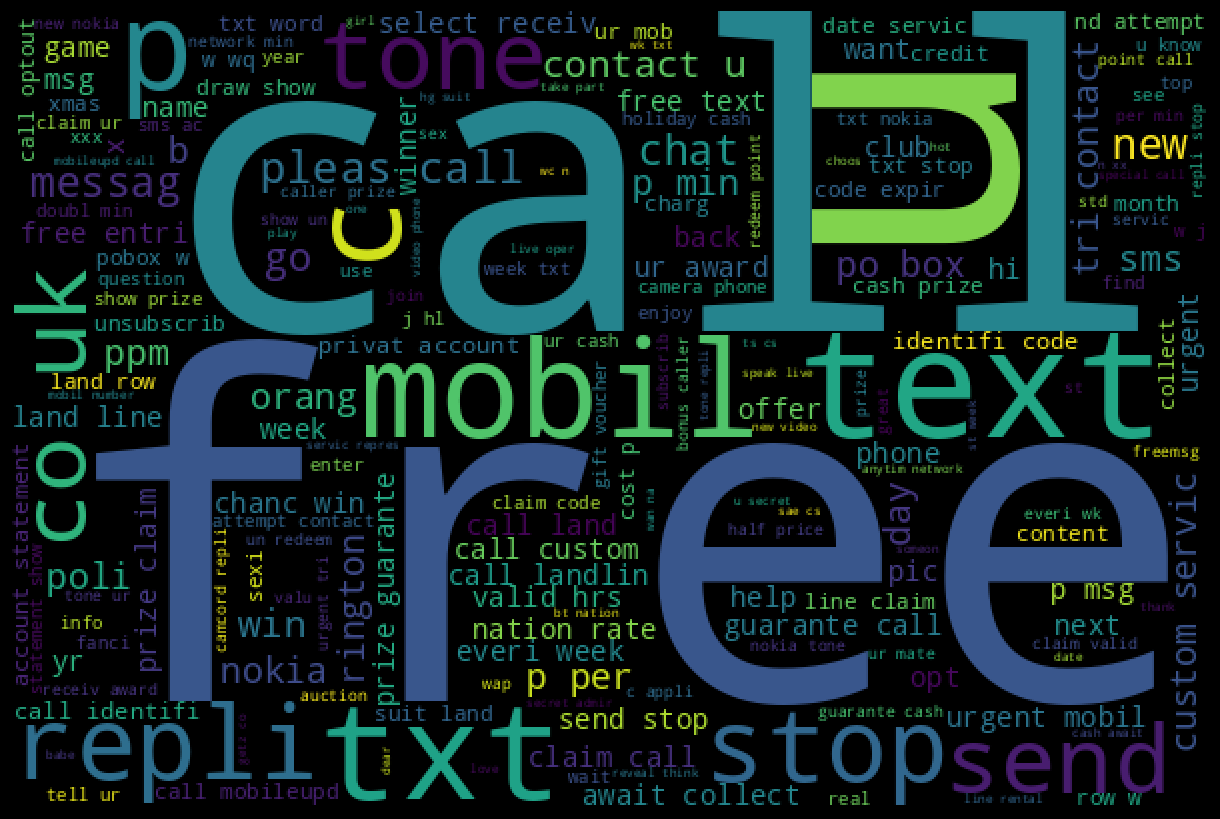

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_palavras))

plt.figure(figsize=(12, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


 Esse código gera uma nuvem de palavras (word cloud) a partir de uma lista de palavras relacionadas a spam. Vou explicar linha por linha:

* `from wordcloud import WordCloud`: Importa a classe WordCloud da biblioteca wordcloud, que é usada para criar visualizações de nuvens de palavras.

* `import matplotlib.pyplot as plt`: Importa a biblioteca matplotlib.pyplot como plt, que é usada para gerar gráficos e visualizações.

* `spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_palavras))`: Cria uma instância da classe WordCloud com largura 600 pixels e altura 400 pixels. Em seguida, gera a nuvem de palavras a partir de uma lista de palavras chamada spam_palavras. A lista de palavras é transformada em uma única string usando o método join, onde cada palavra é separada por um espaço.

* `plt.figure(figsize=(12, 8), facecolor='k')`: Cria uma nova figura do matplotlib com um tamanho de 12 por 8 polegadas e define o fundo da figura como preto ('k' é a abreviação de preto).

* `plt.imshow(spam_wordcloud)`: Exibe a nuvem de palavras na figura criada. A função imshow é usada para mostrar uma imagem na figura.

* `plt.axis('off')`: Desativa os eixos na visualização da nuvem de palavras, removendo as marcas de grade e números de eixos.

* `plt.tight_layout(pad=0)`: Ajusta automaticamente o espaçamento entre os elementos da figura para que eles se encaixem corretamente.

* `plt.show()`: Exibe a figura com a nuvem de palavras na tela.

Em resumo, esse código gera uma nuvem de palavras para visualizar as palavras relacionadas a spam. A nuvem de palavras mostra as palavras mais frequentes em tamanho maior e, potencialmente, em cores diferentes, permitindo uma rápida percepção visual das palavras mais relevantes no contexto de spam.






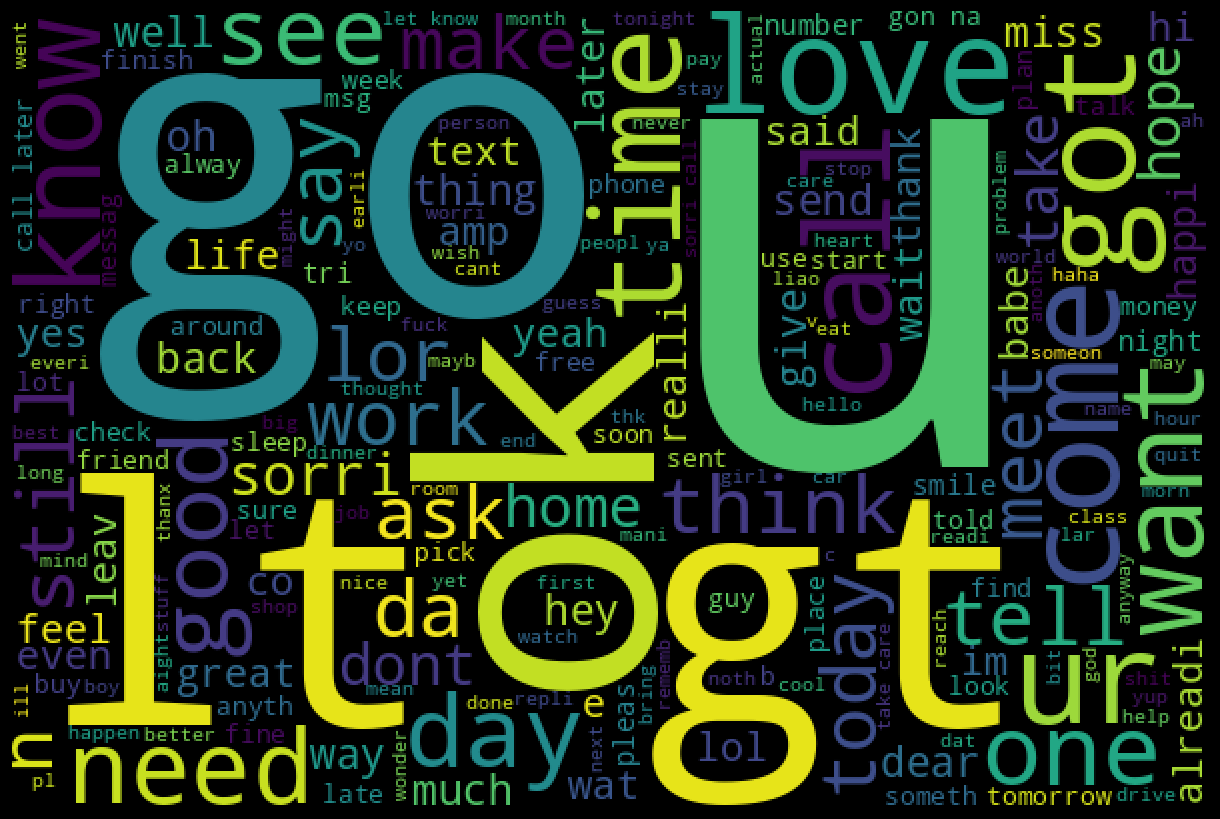

In [31]:
ham_wordcloud = WordCloud(width=600, height=400, margin=2, ranks_only=1).generate(" ".join(ham_palavras))

plt.figure(figsize=(12, 8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
df

,label,mensagem,comprimento
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
...,...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...,161
5568,ham,b go esplanad fr home,37
5569,ham,piti mood suggest,57
5570,ham,guy bitch act like interest buy someth els nex...,125


In [33]:
# Criamos uma função, para trocar Dados CATEGÓRICOS a Dados NUMÉRICOS

def encodeCategory(cat):
  if cat == 'spam':
    return 1
  else:
    return 0    
     

`encodeCategory(cat)` é uma função de codificação simples que recebe um rótulo de categoria como entrada e retorna um valor codificado com base no rótulo. Ela é projetada para um problema de classificação binária, onde o rótulo da categoria é ou 'spam' ou 'ham'.

Aqui está como a função funciona:

Se a entrada cat for igual a `'spam'`, a função retorna `1`, indicando que pertence à categoria 'spam'.
Se a entrada cat for igual a `'ham'`, a função retorna `0`, indicando que pertence à categoria 'ham'.

In [34]:
# Trocando minhas labels para Dados numéricos

df['label'] = df['label'].apply(encodeCategory)

a função `encodeCategory` codifica os rótulos da coluna 'label' do dataframe ***df*** em um problema de classificação binária. Ele alterará os valores originais dos rótulos para seus equivalentes codificados (0 ou 1) com base na função `encodeCategory`.

Aqui está como o código funciona:

* `df['label']`: Isso acessa a coluna 'label' do DataFrame ***df***, que contém os rótulos das categorias.
* `.apply(encodeCategory)`: Isso aplica a função encodeCategory a cada valor na coluna 'label'. Para cada valor na coluna, a função encodeCategory é chamada, que retornará `0` se o rótulo for `'ham'` ou `1` se for `'spam'``.
* O resultado da aplicação da função é atribuído de volta à coluna 'label', substituindo os valores originais pelos valores codificados.


In [35]:
# Verificamos nosso DataFrame para observar as mudanças
# spam --> 1   and  ham --> 0 (não é spam ou "não é malicioso")

df.head(8)

,label,mensagem,comprimento
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkts st ...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
5,1,freemsg hey darl week word back like fun still...,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurun...,160


Vamos converter nosso texto limpo em uma representação que um modelo de Machine Learning possa entender. As Técnicas do `Bag of Words` é uma técnica comum usada no processamento de linguagem natural (PLN) para representar texto como uma coleção desordenada (ou "saco") de palavras. A ideia principal por trás do Bag of Words é converter o texto em um formato numérico que possa ser utilizado por algoritmos de aprendizado de máquina, que normalmente exigem entradas numéricas.:

* Tfidf

`O valor tf–idf, é uma medida estatística que tem o intuito de indicar a importância (mais relevante) de uma palavra` (ou termos) de um documento em relação a uma coleção de documentos ou em um corpus linguístico, para isso se analisa a frequência com que aparecem em uma página (ou documentos, etc). Ela é frequentemente utilizada como fator de ponderação na recuperação de informações e na mineração de dados.

* CountVectorizer

É uma ótima ferramenta fornecida pela biblioteca scikit-learn em Python. `Ele é usado para transformar um determinado texto em um vetor com base na frequência (contagem) de cada palavra` que ocorre em todo o texto.



In [36]:
# Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = 'latin-1', strip_accents = 'unicode')
features = vec.fit_transform(df['mensagem'])

features.shape


(5572, 6216)

O código acima utiliza a biblioteca scikit-learn para criar uma matriz de recursos usando o `TfidfVectorizer`, que é uma variação mais avançada do Bag of Words chamada `TF-IDF` (Term Frequency-Inverse Document Frequency). Essa técnica leva em consideração a frequência das palavras em um documento específico, bem como a importância relativa da palavra em todo o corpus de texto.

Em resumo, `o código usa o TfidfVectorizer para converter as mensagens do DataFrame df em uma matriz de recursos TF-IDF`. A variável features conterá essa matriz, e features.shape retornará um valor como (número_de_documentos, tamanho_do_vocabulário) para indicar a dimensão da matriz resultante.

In [37]:
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['mensagem'])

X.shape

(5572, 6216)


`Em resumo, o código acima utiliza o CountVectorizer para criar uma matriz de contagem de palavras com base nas mensagens do DataFrame df`. A variável X conterá essa matriz, e X.shape retornará um valor como (número_de_documentos, tamanho_do_vocabulário) para indicar a dimensão da matriz resultante. Cada documento (mensagem) é representado como um vetor de contagem de palavras.

In [38]:
cv = CountVectorizer()
X = cv.fit(df['mensagem'])
X.vocabulary_
#X.get_feature_names()


{'go': 2143,
 'jurong': 2787,
 'point': 4043,
 'crazi': 1160,
 'avail': 376,
 'bugi': 729,
 'great': 2217,
 'world': 6054,
 'la': 2891,
 'buffet': 727,
 'cine': 957,
 'got': 2180,
 'amor': 187,
 'wat': 5880,
 'ok': 3715,
 'lar': 2919,
 'joke': 2754,
 'wif': 5975,
 'oni': 3740,
 'free': 1984,
 'entri': 1656,
 'wkli': 6019,
 'comp': 1050,
 'win': 5986,
 'fa': 1772,
 'cup': 1210,
 'final': 1870,
 'tkts': 5465,
 'st': 5033,
 'may': 3232,
 'text': 5351,
 'receiv': 4343,
 'question': 4263,
 'std': 5061,
 'txt': 5622,
 'rate': 4306,
 'appli': 259,
 'dun': 1535,
 'say': 4586,
 'earli': 1552,
 'hor': 2442,
 'alreadi': 161,
 'nah': 3491,
 'think': 5397,
 'goe': 2147,
 'usf': 5737,
 'live': 3029,
 'around': 299,
 'though': 5414,
 'freemsg': 1990,
 'hey': 2375,
 'darl': 1257,
 'week': 5913,
 'word': 6048,
 'back': 411,
 'like': 3001,
 'fun': 2033,
 'still': 5082,
 'tb': 5296,
 'xxx': 6121,
 'chgs': 915,
 'send': 4654,
 'rcv': 4317,
 'even': 1705,
 'brother': 703,
 'speak': 4967,
 'treat': 5566,
 '

O código acima utiliza o `CountVectorizer da biblioteca scikit-learn para contar as palavras e criar um vocabulário a partir das mensagens contidas na coluna 'mensagem' do DataFrame df`. O CountVectorizer é uma técnica do Bag of Words que simplesmente conta a frequência de cada palavra no texto.

`Em resumo, o código utiliza o CountVectorizer para criar um vocabulário e contar a frequência de cada palavra nas mensagens do DataFrame df`. A variável X contém o resultado dessa transformação, e X.vocabulary_ é um dicionário que mapeia palavras para seus índices no vetor de características, enquanto X.get_feature_names() retorna uma lista ordenada de todas as palavras encontradas nas mensagens.

In [39]:

X = cv.fit_transform(df['mensagem']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

O código acima usa a classe CountVectorizer do scikit-learn para transformar dados de texto em uma representação numérica. A ideia é que você tenha um DataFrame chamado df com uma coluna chamada 'mensagem', que contém os textos que você deseja analisar.

O que o código faz é o seguinte:

`cv` é uma instância da classe CountVectorizer, que será usada para converter os textos em uma matriz de contagens de palavras.

`cv.fit_transform(df['mensagem'])`` ajusta o CountVectorizer aos dados de texto na coluna 'mensagem' do DataFrame df e, em seguida, transforma esses dados em uma matriz de contagens de palavras.

`.toarray()` converte a representação esparsa (com muitos zeros) da matriz de contagens em um array NumPy denso (sem zeros).


Agora, você pode usar o array X para análises ou tarefas de modelagem que requerem uma representação numérica dos dados de texto. Cada linha de X corresponde a uma mensagem, e cada coluna corresponde a uma palavra específica (um "token"). O valor em X[i, j] representa quantas vezes o j-ésimo token aparece na i-ésima mensagem.

Após transformar os dados de texto usando o CountVectorizer e criar a matriz densa X, foi criado um novo DataFrame df com as contagens de palavras como colunas.

In [40]:
df2= pd.DataFrame(X, columns = cv.get_feature_names_out())

df2.head(7)

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


No código a seguir, foi criada a nova coluna 'len'` e preenchida com os mesmos valores da coluna 'length'.

In [42]:
df2['len'] = df2['length']
df2.head(6)

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df2.shape

(5572, 6217)

In [44]:
y =df["label"]
print(y.head())    

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [45]:
# Splitting our Dataset into training data and test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state = 0)

In [46]:

X_train.shape

(4457, 6217)

In [47]:

y_train.shape

(4457,)

In [48]:

# Training model using Naive Bayes Classifier 

from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [49]:
# Para o fbeta:
# https://rahulltrehan.medium.com/measurement-of-the-accuracy-of-a-binary-classification-problem-57d634372c5f
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html

print(accuracy_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta = 0.5))

0.9802690582959641
0.9195402298850573


In [50]:

y_pred

array([0, 0, 0, ..., 0, 0, 0])